# **Analyzing Species Data Across the US National Parks: An Introduction to the Data Science Pipeline**
**Fall 2024 Data Science Project**

Vishnu Sreekanth, Dhruv Suri, Suyash Aryal, Neelay Sachdeva

**Contributions**

Vishnu (A, B, D, E, G): I had the idea for the topic of the project, found the dataset, and preprocessed/cleaned the data so that it was ready for analysis. I also created the Random Forest model and worked through its training/testing process in the Primary Analysis section.

Dhruv (C, F, G): I did the chi-squared test on the data, as well as created a visualization for the findings from that test. In addition, I summarized our findings, wrote our conclusion, and explained our next steps.

Suyash (C, F, G): I did the independent T-test on the database and did a visualization about my findings. I also worked on the visualization of the Random forest model.

Neelay (C, F, G): I did the ANOVA test on the data and created a graph on the results from that test. I also wrote the conclusion at the end of the data analysis section, and I wrote an analysis for our visualization.

# **Introduction**

The dataset that we are analyzing contains all of the plants and animals recorded to exist in the American National Parks. We decided to choose this dataset because we each have a great level of appreciation for the
National Parks, and the outdoors in general, and are interested in the Parks' biodiversity. Doing statistical analysis on this dataset will enable us to properly understand the types of species that live in each park, potentially giving us greater insight into what specific accommodations should be made and what steps should be taken in order to protect the wildlife and preserve the ecosystem in each individual park.

In particular, for the scope of this tutorial, we would like to study the impact of a species' type, origin, and behavior on its conservation status. Being able to predict the latter from the former will pave the way for the parks to be able to identify species that are more prone to being endangered without having data on the quantity of the species and take steps necessary to work towards remedying that.

# **Data Curation and Preprocessing**

We found the dataset on Kaggle.com. The page is linked here: https://www.kaggle.com/datasets/nationalparkservice/park-biodiversity/data.

The dataset is made up of two CSV files: parks.csv, which contains data on the parks themselves, and species.csv, which contains every individual species across all of the parks. These CSV files are linked below.

parks.csv: https://drive.google.com/file/d/1l5UR9vAWa7aFyvUCkI7SK_gUw6I6hHKB/view?usp=sharing

species.csv: https://drive.google.com/file/d/108L_LFDnIRmQB0d0xkQ9PdZ1-EthCWZS/view?usp=sharing

Before we start preprocessing, and our data analysis as a whole, we need to import a variety of different libraries. We do so below.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import re

**Preprocessing parks.csv**

Now, we can start preprocessing. Here, we read the parks.csv file using pd.read_csv in order to create a Pandas dataframe containing all of the national parks.

In [2]:
parks_df = pd.read_csv('parks.csv')
parks_df

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08
5,BLCA,Black Canyon of the Gunnison National Park,CO,32950,38.57,-107.72
6,BRCA,Bryce Canyon National Park,UT,35835,37.57,-112.18
7,CANY,Canyonlands National Park,UT,337598,38.20,-109.93
8,CARE,Capitol Reef National Park,UT,241904,38.20,-111.17
9,CAVE,Carlsbad Caverns National Park,NM,46766,32.17,-104.44


No entries have any missing values for any of the columns, so we don't need to worry about dealing with missing data. The values check out too. However, we want to ensure that all of the quantitative features are expressed as ints/floats rather than strings.

In [3]:
parks_df.dtypes

,0
Park Code,object
Park Name,object
State,object
Acres,int64
Latitude,float64
Longitude,float64


Every quantitative feature is expressed as an int or a float, so there is nothing further that we need to do for parks_df.

**Preprocessing species.csv**

Now for the species dataset. Here, we read the species.csv file using pd.read_csv in order to create a Pandas dataframe containing all of the species residing in the parks.

In [4]:
species_df = pd.read_csv('species.csv')
species_df

<ipython-input-4-851c100b76db>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  species_df = pd.read_csv('species.csv')


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN,NaN


From first glance, there are quite a bit of missing values. This dataset is very large, with 119248 rows. So to find out how many values are missing for each category, we will use the .count() function.

In [5]:
species_df.count()

,0
Species ID,119248
Park Name,119248
Category,119248
Order,117776
Family,117736
Scientific Name,119248
Common Names,92101
Record Status,119242
Occurrence,99106
Nativeness,94203


The only columns with no missing data are Species ID, Park Name, Category, and Scientific Name. We now need to decide what to do about the rest of the columns.

Common Names contains what the species are commonly known as, and seems to be present in the dataset purely for the observer's convenience so they do not have to look up what a species is by its scientific name. It will not directly affect our analysis at all, so we will leave it as is.

The Order and Family columns will be important to our analysis if we want to learn more about the specifics of the species residing in each park. We will employ Listwise Deletion here on all rows with values missing for Order since the proportion of rows with missing values for this column is relatively small.

In [6]:
species_df = species_df.dropna(subset=['Order'])
species_df.count()

,0
Species ID,117776
Park Name,117776
Category,117776
Order,117776
Family,117577
Scientific Name,117776
Common Names,91787
Record Status,117770
Occurrence,98536
Nativeness,93778


We will now employ Listwise Deletion here on all rows with values missing for Family since the proportion of rows with missing values for this column continues to be quite small.

In [7]:
species_df = species_df.dropna(subset=['Family'])
species_df.count()

,0
Species ID,117577
Park Name,117577
Category,117577
Order,117577
Family,117577
Scientific Name,117577
Common Names,91683
Record Status,117571
Occurrence,98484
Nativeness,93730


Now for the remaining columns: Record Status, Occurrence, Nativeness, Abundance, Seasonality, Conversation Status, and Unnamed: 13. We will now see all of the possible categorical values that each of these columns have to see whether we can do imputation. We will start with Record Status.

In [8]:
record_status_values = species_df['Record Status'].unique()
record_status_values

array(['Approved', 'In Review', ' Purple Cockle', ' Dames Rocket',
       ' Manati', " Ranchers' Fireweed", ' Cocodrilo De Tumbes',
       ' Cabezon', ' Wapiti', ' Short-Tailed Weasel',
       ' White-Footed Mouse', ' Northern Goshawk', ' Northern Pintail',
       ' Common Poorwill', ' Pigeon Hawk', ' Bushtit', ' American Crow',
       ' Catbird', ' Robin', ' Speckled Trout', ' Osha', ' Wild Iris',
       ' Fringed Sage', ' Rushpink', ' Ground Daisy', ' Bluebell',
       ' Cenizo', ' Goosefoot', ' Claret Cup', " Devil's Shoelaces",
       ' Verdolagas', ' Chico', ' Skyrocket Gilia', ' Grass-Leaf Loco',
       ' Golden Pea', ' Storksbill', ' Cranesbill', ' Speedwell',
       ' Common Mullein', ' Willowherb', ' Wiregrass', ' Downy Chess',
       ' Leather Flower', ' Shadbush', ' Wild Rose', ' Skunkbush',
       ' Clover Bush', ' Kinnikinnick', ' Filaree', ' Liver Leaf*', ' *',
       ' Whortleberry', nan, 'P.Nut Sedge'], dtype=object)

As you may have noticed, this is extremely odd - besides NaN, 'Approved' and 'In Review', every value here doesn't seem to be a record status at all, rather, they seem to be species names. To investigate further, we will filter out all rows with missing values, 'Approved', and 'In Review' for this column.

In [9]:
odd_rows = species_df[(species_df['Record Status'] != "Approved") & (species_df['Record Status'] != "In Review") & ~(species_df['Record Status'].isna())]
odd_rows

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
812,ACAD-1812,Acadia National Park,Vascular Plant,Caryophyllales,Caryophyllaceae,Agrostemma githago,Corn Cockle,Purple Cockle,Approved,Not Confirmed,Not Native,NaN,NaN,NaN
3280,BADL-1523,Badlands National Park,Vascular Plant,Brassicales,Brassicaceae,Hesperis matronalis,Dame's Rocket,Dames Rocket,Approved,Present,Not Native,Rare,NaN,NaN
6441,BISC-1026,Biscayne National Park,Mammal,Sirenia,Trichechidae,Trichechus manatus,Manatee,Manati,Approved,Present,Unknown,Unknown,NaN,Endangered
27484,DEVA-2399,Death Valley National Park,Vascular Plant,Boraginales,Boraginaceae,Amsinckia menziesii,Fiddleneck,Ranchers' Fireweed,Approved,Present,Native,Unknown,NaN,NaN
31786,EVER-1414,Everglades National Park,Reptile,Crocodilia,Crocodylidae,Crocodylus acutus,American Crocodile,Cocodrilo De Tumbes,Approved,Present,Native,Uncommon,Resident,Threatened
31826,EVER-1454,Everglades National Park,Reptile,Testudines,Cheloniidae,Caretta caretta,Loggerhead,Cabezon,Approved,Present,Native,Rare,Breeder,Threatened
44600,GRSA-1003,Great Sand Dunes National Park and Preserve,Mammal,Artiodactyla,Cervidae,Cervus elaphus,American Elk,Wapiti,Approved,Present,Native,Rare,Migratory,NaN
44610,GRSA-1013,Great Sand Dunes National Park and Preserve,Mammal,Carnivora,Mustelidae,Mustela erminea,Ermine,Short-Tailed Weasel,Approved,Present,Native,Rare,Migratory,NaN
44640,GRSA-1043,Great Sand Dunes National Park and Preserve,Mammal,Rodentia,Cricetidae,Peromyscus maniculatus,Deer Mouse,White-Footed Mouse,Approved,Present,Native,Rare,Breeder,NaN
44666,GRSA-1069,Great Sand Dunes National Park and Preserve,Bird,Accipitriformes,Accipitridae,Accipiter gentilis,Goshawk,Northern Goshawk,Approved,Present,Native,Rare,Breeder,NaN


The problem is now clear - for these rows, an alternate common name takes up the Record Status column, shifting all the values past it to the right by one column: so Record Status values lie under Occurrence, Occurrence values lie under Nativeness, etc. Unnamed: 13 seems to be a column that stores all Conversation Status values for these affected rows. We fix this problem below.

In [10]:
odd_indexes = []
for index, row in odd_rows.iterrows():
  odd_indexes.append(index)
  species_df.loc[index, ['Record Status', 'Occurrence', 'Nativeness', 'Abundance', 'Seasonality', 'Conservation Status']] = [
      species_df.loc[index, 'Occurrence'],
      species_df.loc[index, 'Nativeness'],
      species_df.loc[index, 'Abundance'],
      species_df.loc[index, 'Seasonality'],
      species_df.loc[index, 'Conservation Status'],
      species_df.loc[index, 'Unnamed: 13']
  ]
species_df[species_df.index.isin(odd_indexes)]

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
812,ACAD-1812,Acadia National Park,Vascular Plant,Caryophyllales,Caryophyllaceae,Agrostemma githago,Corn Cockle,Approved,Not Confirmed,Not Native,NaN,NaN,NaN,NaN
3280,BADL-1523,Badlands National Park,Vascular Plant,Brassicales,Brassicaceae,Hesperis matronalis,Dame's Rocket,Approved,Present,Not Native,Rare,NaN,NaN,NaN
6441,BISC-1026,Biscayne National Park,Mammal,Sirenia,Trichechidae,Trichechus manatus,Manatee,Approved,Present,Unknown,Unknown,NaN,Endangered,Endangered
27484,DEVA-2399,Death Valley National Park,Vascular Plant,Boraginales,Boraginaceae,Amsinckia menziesii,Fiddleneck,Approved,Present,Native,Unknown,NaN,NaN,NaN
31786,EVER-1414,Everglades National Park,Reptile,Crocodilia,Crocodylidae,Crocodylus acutus,American Crocodile,Approved,Present,Native,Uncommon,Resident,Threatened,Threatened
31826,EVER-1454,Everglades National Park,Reptile,Testudines,Cheloniidae,Caretta caretta,Loggerhead,Approved,Present,Native,Rare,Breeder,Threatened,Threatened
44600,GRSA-1003,Great Sand Dunes National Park and Preserve,Mammal,Artiodactyla,Cervidae,Cervus elaphus,American Elk,Approved,Present,Native,Rare,Migratory,NaN,NaN
44610,GRSA-1013,Great Sand Dunes National Park and Preserve,Mammal,Carnivora,Mustelidae,Mustela erminea,Ermine,Approved,Present,Native,Rare,Migratory,NaN,NaN
44640,GRSA-1043,Great Sand Dunes National Park and Preserve,Mammal,Rodentia,Cricetidae,Peromyscus maniculatus,Deer Mouse,Approved,Present,Native,Rare,Breeder,NaN,NaN
44666,GRSA-1069,Great Sand Dunes National Park and Preserve,Bird,Accipitriformes,Accipitridae,Accipiter gentilis,Goshawk,Approved,Present,Native,Rare,Breeder,NaN,NaN


We confirm that Record Status values are now either NaN, Approved, or In Review below.

In [11]:
species_df['Record Status'].unique()

array(['Approved', 'In Review', nan], dtype=object)

Since we can't really deem a NaN as Approved or In Review, we will use Pairwise Deletion for analysis of the Record Status row, acknowledging the difference in sample size. Moving on to Occurrences.

In [12]:
species_df['Occurrence'].unique()

array(['Present', 'Not Confirmed', 'Not Present (Historical Report)',
       'Not Present (False Report)', nan, 'Not Present', 'In Review'],
      dtype=object)

All of these values make sense... except for In Review, which corresponds with Record Status. It looks like some rows with NaN for Record Status have the same issue as those rows from before. To further investigate, we filter the rows with 'In Review' for Occurrence below.

In [13]:
species_df[species_df['Occurrence'] == "In Review"]

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
96934,ROMO-3981,Rocky Mountain National Park,Fungi,Trichiales,Trichiaceae,Arcyria,pomiformis,NaN,In Review,Present,NaN,NaN,NaN,NaN
96943,ROMO-3990,Rocky Mountain National Park,Fungi,Trichiales,Trichiaceae,Trichia,alpina,NaN,In Review,Present,NaN,NaN,NaN,NaN
96944,ROMO-3991,Rocky Mountain National Park,Fungi,Trichiales,Trichiaceae,Trichia,botrytis,NaN,In Review,Present,NaN,NaN,NaN,NaN
96945,ROMO-3992,Rocky Mountain National Park,Fungi,Trichiales,Trichiaceae,Trichia,sordida,NaN,In Review,Present,NaN,NaN,NaN,NaN
96946,ROMO-3993,Rocky Mountain National Park,Fungi,Trichiales,Trichiaceae,Trichia,subfusca,NaN,In Review,Present,NaN,NaN,NaN,NaN
96947,ROMO-3994,Rocky Mountain National Park,Fungi,Trichiales,Trichiaceae,Trichia,varia,NaN,In Review,Present,NaN,NaN,NaN,NaN


Just as we suspected, the values for these rows seem to be shifted the same way as before, as 'Present' falls under Nativeness for all of them. We fix them below.

In [14]:
odd_indexes = []
for index, row in species_df[species_df['Occurrence'] == "In Review"].iterrows():
  odd_indexes.append(index)
  species_df.loc[index, ['Record Status', 'Occurrence', 'Nativeness', 'Abundance', 'Seasonality', 'Conservation Status']] = [
      species_df.loc[index, 'Occurrence'],
      species_df.loc[index, 'Nativeness'],
      species_df.loc[index, 'Abundance'],
      species_df.loc[index, 'Seasonality'],
      species_df.loc[index, 'Conservation Status'],
      species_df.loc[index, 'Unnamed: 13']
  ]
species_df[species_df.index.isin(odd_indexes)]

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
96934,ROMO-3981,Rocky Mountain National Park,Fungi,Trichiales,Trichiaceae,Arcyria,pomiformis,In Review,Present,NaN,NaN,NaN,NaN,NaN
96943,ROMO-3990,Rocky Mountain National Park,Fungi,Trichiales,Trichiaceae,Trichia,alpina,In Review,Present,NaN,NaN,NaN,NaN,NaN
96944,ROMO-3991,Rocky Mountain National Park,Fungi,Trichiales,Trichiaceae,Trichia,botrytis,In Review,Present,NaN,NaN,NaN,NaN,NaN
96945,ROMO-3992,Rocky Mountain National Park,Fungi,Trichiales,Trichiaceae,Trichia,sordida,In Review,Present,NaN,NaN,NaN,NaN,NaN
96946,ROMO-3993,Rocky Mountain National Park,Fungi,Trichiales,Trichiaceae,Trichia,subfusca,In Review,Present,NaN,NaN,NaN,NaN,NaN
96947,ROMO-3994,Rocky Mountain National Park,Fungi,Trichiales,Trichiaceae,Trichia,varia,In Review,Present,NaN,NaN,NaN,NaN,NaN


We confirm that Occurrence values are now either NaN, Present, Not Confirmed, Not Present, Not Present (Historical Report), or Not Present (False Report) below.

In [15]:
species_df['Occurrence'].unique()

array(['Present', 'Not Confirmed', 'Not Present (Historical Report)',
       'Not Present (False Report)', nan, 'Not Present'], dtype=object)

We will look at the values of the remaining columns now to make sure that they don't have a similar issue.

In [16]:
species_df['Nativeness'].unique()

array(['Native', 'Not Native', 'Unknown', nan], dtype=object)

In [17]:
species_df['Abundance'].unique()

array(['Rare', 'Abundant', 'Common', nan, 'Uncommon', 'Occasional',
       'Unknown'], dtype=object)

In [18]:
species_df['Seasonality'].unique()

array(['Resident', nan, 'Breeder', 'Vagrant', 'Migratory',
       'Breeder, Migratory', 'Breeder, Summer', 'Migratory, Vagrant',
       'Breeder, Resident', 'Migratory, Winter', 'Breeder, Winter',
       'Winter', 'Resident, Winter', 'Summer, Vagrant',
       'Breeder, Resident, Summer', 'Resident, Summer', 'Summer',
       'Breeder, Resident, Migratory, Summer',
       'Breeder, Resident, Summer, Winter', 'Migratory, Summer',
       'Winter, Vagrant'], dtype=object)

In [19]:
species_df['Conservation Status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'In Recovery',
       'Threatened', 'Under Review', 'Proposed Threatened', 'Extinct',
       'Proposed Endangered'], dtype=object)

The values of these columns look to be fine, with no odd values. Just to be safe, we will confirm that both the Nativeness and Abundance columns can have "Unknown".

In [20]:
species_df[species_df['Nativeness'] == "Unknown"]

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN
10,ACAD-1010,Acadia National Park,Mammal,Carnivora,Mustelidae,Mustela,Weasel,In Review,Not Confirmed,Unknown,NaN,NaN,NaN,NaN
63,ACAD-1063,Acadia National Park,Bird,Accipitriformes,Accipitridae,Buteo swainsoni,Swainson's Hawk,Approved,Not Confirmed,Unknown,NaN,NaN,NaN,NaN
75,ACAD-1075,Acadia National Park,Bird,Anseriformes,Anatidae,Anas platyrhynchos,"Common Mallard, Mallard",Approved,Present,Unknown,Common,Breeder,NaN,NaN
78,ACAD-1078,Acadia National Park,Bird,Anseriformes,Anatidae,Anser albifrons,"Common White-Fronted Goose, Greater White-Fron...",Approved,Present,Unknown,Occasional,Vagrant,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115687,YOSE-1323,Yosemite National Park,Bird,Pelecaniformes,Ardeidae,Butorides virescens,Green Heron,Approved,Present,Unknown,Occasional,Vagrant,NaN,NaN
115691,YOSE-1327,Yosemite National Park,Bird,Pelecaniformes,Pelecanidae,Pelecanus occidentalis,Brown Pelican,Approved,Present,Unknown,Rare,Vagrant,In Recovery,NaN
115711,YOSE-1347,Yosemite National Park,Bird,Strigiformes,Strigidae,Asio flammeus,Short-Eared Owl,Approved,Present,Unknown,Rare,Summer,Species of Concern,NaN
117862,ZION-1410,Zion National Park,Reptile,Testudines,Testudinidae,Gopherus agassizii,Desert Tortoise,Approved,Present,Unknown,Rare,Breeder,Threatened,NaN


In [21]:
species_df[species_df['Abundance'] == "Unknown"]

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
21,ACAD-1021,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasionycteris noctivagans,Silver-Haired Bat,Approved,Present,Native,Unknown,NaN,Species of Concern,NaN
23,ACAD-1023,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Lasiurus cinereus,Hoary Bat,Approved,Present,Native,Unknown,NaN,NaN,NaN
74,ACAD-1074,Acadia National Park,Bird,Anseriformes,Anatidae,Anas penelope,"Eurasian Wigeon, European Widgeon, Widgeon",Approved,Present,Not Native,Unknown,Vagrant,NaN,NaN
77,ACAD-1077,Acadia National Park,Bird,Anseriformes,Anatidae,Anas strepera,Gadwall,Approved,Present,Not Native,Unknown,Vagrant,NaN,NaN
145,ACAD-1145,Acadia National Park,Bird,Charadriiformes,Recurvirostridae,Recurvirostra americana,"American Avocet, Avocet",Approved,Present,Not Native,Unknown,Vagrant,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117910,ZION-1458,Zion National Park,Vascular Plant,Apiales,Apiaceae,Conium maculatum,Poison Hemlock,Approved,Present,Not Native,Unknown,NaN,NaN,NaN
118014,ZION-1562,Zion National Park,Vascular Plant,Asterales,Asteraceae,Brickellia californica X longifolia,Hybrid Brickellbush,Approved,Present,Native,Unknown,NaN,NaN,NaN
118128,ZION-1676,Zion National Park,Vascular Plant,Asterales,Asteraceae,Hymenoxys acaulis,Stemless Hymenoxys,Approved,Present,Native,Unknown,NaN,NaN,NaN
118158,ZION-1706,Zion National Park,Vascular Plant,Asterales,Asteraceae,Prenanthella exigua,Prenanthella,Approved,Present,Native,Unknown,NaN,NaN,NaN


Since there are rows which have values for Abundance while Nativeness is Unknown, and rows which have values for Nativeness while Abundance is Unknown, we know that there is no right shift.

Now for imputation. We will change all NaN values of Nativeness to be Unknown, and all NaN values of Abundance to be Unknown, since them being NaN means that we don't know what they are, so for our purposes we can simply deem them Unknown. For the Occurrence, Seasonality, and Conservation Status columns, we will use Pairwise Deletion for specific analysis on them, acknowledging the difference in sample sizes, since we can't really categorize them in any of the existing categories without further information.

In [22]:
for index, row in species_df[species_df['Nativeness'].isna()].iterrows():
  species_df.loc[index, 'Nativeness'] = "Unknown"
for index, row in species_df[species_df['Abundance'].isna()].iterrows():
  species_df.loc[index, 'Abundance'] = "Unknown"
species_df.count()

,0
Species ID,117577
Park Name,117577
Category,117577
Order,117577
Family,117577
Scientific Name,117577
Common Names,91683
Record Status,117577
Occurrence,98484
Nativeness,117577


The Unnamed: 13 column is no longer needed since we fixed the shifts, so we can drop it.

In [23]:
species_df = species_df.drop(columns="Unnamed: 13")
species_df

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,Unknown,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN


Since species_df has no quantitative features, we don't have to worry about converting quantitative values to ints or floats. Now, there is nothing further we need to do with respect to data preprocessing.

# **Exploratory Data Analysis**

Here, we perform three different hypothesis tests to better understand the relationships within our data.

**1)** First, we will perform an independent T-test to test the relationship between species abundance and nativeness in national parks.
- Null Hypothesis (H₀): The mean abundance of native species is equal to that of non-native species.
- Alternative Hypothesis (H₁): The mean abundance of native species is significantly different from that of non-native species.

In [24]:
abundance_mapping = {
    'Abundant': 4,
    'Common': 3,
    'Uncommon': 2,
    'Rare': 1
}

species_df['Abundance_Numeric'] = species_df['Abundance'].map(abundance_mapping)

native_species = species_df[species_df['Nativeness'] == 'Native']['Abundance_Numeric'].dropna()
non_native_species = species_df[species_df['Nativeness'] == 'Not Native']['Abundance_Numeric'].dropna()

t_stat, p_value = stats.ttest_ind(native_species, non_native_species)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 23.732473655125975
P-value: 9.870179051090656e-124


Given that the p-value is extremely small (essentially zero), we reject the null hypothesis. This indicates that there is a statistically significant difference in the abundance levels between native and non-native species in national parks. Specifically, native species tend to have different levels of abundance compared to non-native species.

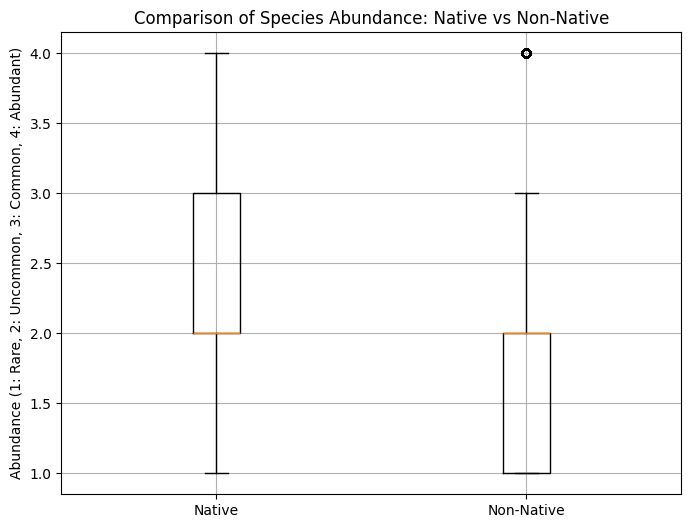

In [25]:
plt.figure(figsize=(8, 6))
plt.boxplot([native_species, non_native_species], labels=['Native', 'Non-Native'])
plt.title('Comparison of Species Abundance: Native vs Non-Native')
plt.ylabel('Abundance (1: Rare, 2: Uncommon, 3: Common, 4: Abundant)')
plt.grid(True)
plt.show()

The plot shows that native species generally have higher abundance levels, which supports the result of the t-test, indicating a significant difference between the two groups.

**2)** Next, we will perform a chi-squared test to test if the category of a species has an effect on its presence in the parks.
- Null Hypothesis (H₀): The category of a species has no effect on its presence in its park.
- Alternative Hypothesis (H₁): The category of a species does affect its presence in its park.

In [26]:
res = pd.crosstab(species_df['Category'], species_df['Occurrence'])
res

Occurrence,Not Confirmed,Not Present,Not Present (False Report),Not Present (Historical Report),Present
Category,,,,,
Algae,1,0,0,0,365
Amphibian,103,5,40,21,461
Bird,1391,103,338,226,12046
Crab/Lobster/Shrimp,3,0,0,0,304
Fish,709,17,144,103,2730
Fungi,34,0,0,0,2909
Insect,421,2,16,10,7758
Invertebrate,20,1,0,9,853
Mammal,570,26,47,111,2767


We then graph the number of Present categories using a bar plot.

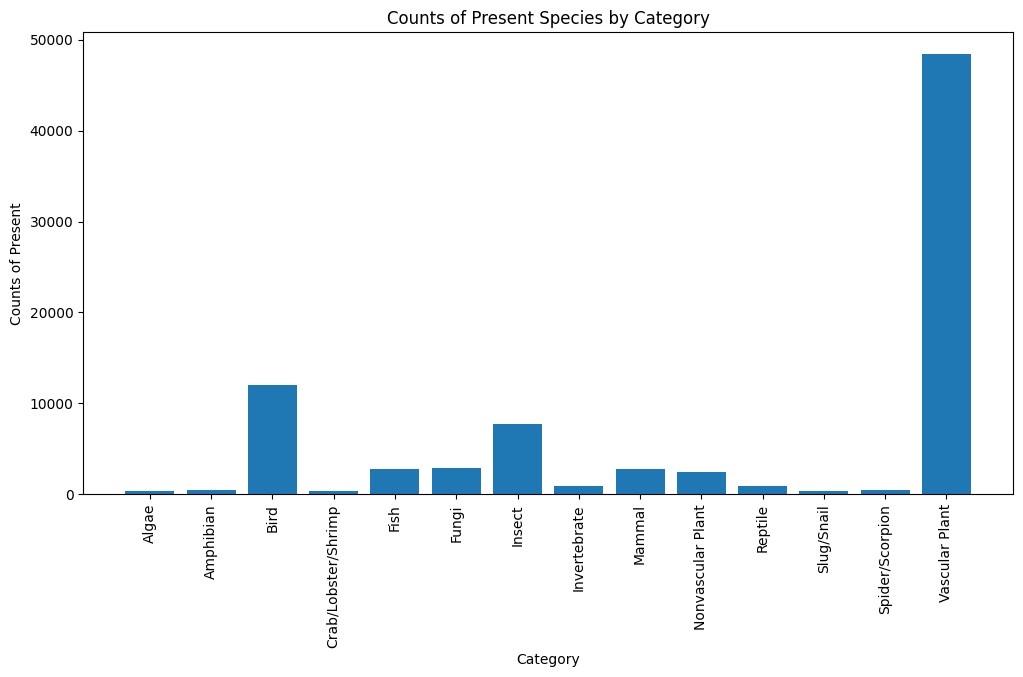

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(res.index, res['Present'])

plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Counts of Present')
plt.title('Counts of Present Species by Category')

plt.show()

We will then perform our chi-squared test.

In [28]:
p = stats.chi2_contingency(res)
print("p-value: " + str(p.pvalue))

p-value: 0.0


Because the p-value of our chi-squared test is 0, which is less than our alpha value of 0.05, we reject the null hypothesis and conclude that the category of a species does have an effect on its presence in its park.

**3)** The final test we will run is an ANOVA test on the location of the parks and the percentage of native species in the park. The parks will be categorized into eastern, central, and western parks based on their location, and the percentage of

- Null Hypothesis (H₀): The park location has no affect on the percentage of native species in the park.
- Alternative Hypothesis (H₁): The park location does affect the percentage of native species.

What we first need to do is categorize each park into eastern, central, and western. We will define eastern parks has having a longitude of x > -85, central parks as having a longitude of -85 > x > -110, and western parks as having a longitude of x < -110.

In [29]:
eastern_parks = parks_df[parks_df['Longitude'] > -90]
central_parks = parks_df[(parks_df['Longitude'] > -115) & (parks_df['Longitude'] < -90)]
western_parks = parks_df[parks_df['Longitude'] < -115]
eastern_parks

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08
11,CONG,Congaree National Park,SC,26546,33.78,-80.78
13,CUVA,Cuyahoga Valley National Park,OH,32950,41.24,-81.55
16,DRTO,Dry Tortugas National Park,FL,64701,24.63,-82.87
17,EVER,Everglades National Park,FL,1508538,25.32,-80.93
24,GRSM,Great Smoky Mountains National Park,"TN, NC",521490,35.68,-83.53
30,ISRO,Isle Royale National Park,MI,571790,48.10,-88.55
37,MACA,Mammoth Cave National Park,KY,52830,37.18,-86.10
48,SHEN,Shenandoah National Park,VA,199045,38.53,-78.35


Next we have to assign the percentage of native species to each park. To do this, we can find the number of native species in each park and divide by the total number of species.

In [30]:
native_species_counts = species_df[species_df['Nativeness'] == 'Native']['Park Name'].value_counts()
total_species_counts = species_df['Park Name'].value_counts()
percentage_native_species = (native_species_counts / total_species_counts) * 100

eastern_parks['Native Percentage'] = eastern_parks['Park Name'].map(percentage_native_species)
central_parks['Native Percentage'] = central_parks['Park Name'].map(percentage_native_species)
western_parks['Native Percentage'] = western_parks['Park Name'].map(percentage_native_species)
western_parks

<ipython-input-30-ea1e2394b31a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eastern_parks['Native Percentage'] = eastern_parks['Park Name'].map(percentage_native_species)
<ipython-input-30-ea1e2394b31a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_parks['Native Percentage'] = central_parks['Park Name'].map(percentage_native_species)
<ipython-input-30-ea1e2394b31a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,Park Code,Park Name,State,Acres,Latitude,Longitude,Native Percentage
10,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42,86.535391
12,CRLA,Crater Lake National Park,OR,183224,42.94,-122.10,37.785936
14,DENA,Denali National Park and Preserve,AK,3372402,63.33,-150.50,78.326996
15,DEVA,Death Valley National Park,"CA, NV",4740912,36.24,-116.82,36.227545
18,GAAR,Gates Of The Arctic National Park and Preserve,AK,7523898,67.78,-153.30,64.631422
20,GLBA,Glacier Bay National Park and Preserve,AK,3224840,58.50,-137.00,69.662338
27,HALE,Haleakala National Park,HI,29094,20.72,-156.17,51.559416
28,HAVO,Hawaii Volcanoes National Park,HI,323431,19.38,-155.20,55.589681
31,JOTR,Joshua Tree National Park,CA,789745,33.79,-115.90,54.201496
32,KATM,Katmai National Park and Preserve,AK,3674530,58.50,-155.00,82.133995


We can display the native percentage for each region using a box and whisker plot.

Text(0.5, 1.0, 'Native Species Percentage by Region')

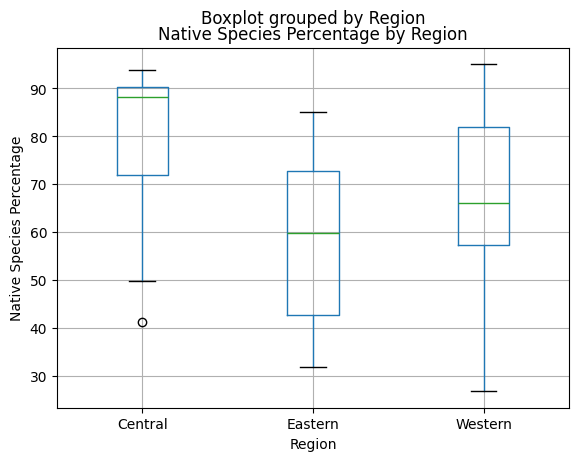

In [31]:
all_parks = pd.concat([eastern_parks, central_parks, western_parks])
# Add a new column that defines parks as either eastern, central, or western
all_parks['Region'] = all_parks['Longitude'].apply(lambda x: 'Eastern' if x > -90 else ('Central' if x > -115 else 'Western'))
all_parks.boxplot(column='Native Percentage', by='Region')
plt.xlabel('Region')
plt.ylabel('Native Species Percentage')
plt.title('Native Species Percentage by Region')

Finally we apply the ANOVA test and find the p-value.

In [32]:
f_stat, pv = stats.f_oneway(eastern_parks['Native Percentage'], central_parks['Native Percentage'], western_parks['Native Percentage'])
print("p-value: " + str(pv))

p-value: 0.004402657652940368


The p-value is extremely low (< 0.05), so we can reject the null hypothesis and conclude that Park location does have an impact on percentage of native species.

**Conclusion**

All three statistical methods were used to determine some characteristic relating to the overall health of parks. The first hypothesis test done was to test the relationship between nativeness and abundance. This is important for the health of the parks since we would like to see that native species are more abundant than non-native species. We concluded that there was indeed a difference between the abundance of native vs non-native species.

The second test done was the chi squared test on species category and the presence of each category. We want to see around an even distribution of presence in each category; however, this is not what we saw. One design flaw that occured, though, is that we used presence as a count instead of a percentage, so some presence counts were skewed simply because there were more of those species listed.

The final test done was the ANOVA on the region that the park was in and the nativeness in those parks. We found that the park region does have an affect on the the percentage of native species in the park. To further look into this we would have to do individual hypothesis tests on the regions to determine which regions specifically have a different native percentage.

# **Primary Analysis and Machine Learning**

To address our goal from the introduction (tracing the impact of a species' type, origin, and behavior on its conservation status), we will leverage the power of supervised machine learning. In particular, we will train a Random Forest Classifier model to predict a species' conservation status based upon its category, order, abundance, and seasonality. When a new species emerges or is discovered within the park, in areas nearby, or in different areas altogether, such a model can identify whether it is at risk of being endangered.

The columns that best encapsulate the type, origin, and behavior of the species are category, order, family, nativeness, and seasonality. The first three are all information about the types of the species, nativeness describes the species' origin, and seasonality describes their behavior/habitation patterns. We would like to see whether these can accurately indicate a species' conservation status.

To start, we first need to do Pairwise Deletion, so as to eliminate the rows that have a missing value from at least one of these categories. We will also need to only include these categories. A separate dataframe that does both of these is created below.

In [33]:
random_forest_df = species_df[['Category', 'Order', 'Family', 'Nativeness', 'Seasonality', 'Conservation Status']]
random_forest_df = random_forest_df.dropna()
random_forest_df

,Category,Order,Family,Nativeness,Seasonality,Conservation Status
57,Bird,Accipitriformes,Accipitridae,Native,Breeder,Species of Concern
58,Bird,Accipitriformes,Accipitridae,Native,Vagrant,Species of Concern
60,Bird,Accipitriformes,Accipitridae,Native,Resident,Species of Concern
61,Bird,Accipitriformes,Accipitridae,Native,Migratory,Species of Concern
64,Bird,Accipitriformes,Accipitridae,Native,Breeder,Species of Concern
...,...,...,...,...,...,...
117849,Reptile,Squamata,Iguanidae,Native,Breeder,Species of Concern
117852,Reptile,Squamata,Iguanidae,Native,Breeder,Species of Concern
117862,Reptile,Testudines,Testudinidae,Unknown,Breeder,Threatened
117872,Fish,Cypriniformes,Catostomidae,Native,Breeder,Species of Concern


Since all of the predictor features that we are dealing with are categorical, we need to apply one-hot encoding to the dataframe. We can do this with the pd.get_dummies method.

In [34]:
encoded_random_forest_df = pd.get_dummies(random_forest_df[['Category', 'Order', 'Family', 'Nativeness', 'Seasonality']], dtype=int)
encoded_random_forest_df['Conservation Status'] = random_forest_df['Conservation Status']
encoded_random_forest_df

,Category_Amphibian,Category_Bird,Category_Crab/Lobster/Shrimp,Category_Fish,Category_Insect,Category_Mammal,Category_Reptile,Category_Slug/Snail,Order_Accipitriformes,Order_Acipenseriformes,...,"Seasonality_Breeder, Winter",Seasonality_Migratory,"Seasonality_Migratory, Winter",Seasonality_Resident,Seasonality_Summer,"Seasonality_Summer, Vagrant",Seasonality_Vagrant,Seasonality_Winter,"Seasonality_Winter, Vagrant",Conservation Status
57,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Species of Concern
58,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,Species of Concern
60,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,Species of Concern
61,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,Species of Concern
64,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Species of Concern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117849,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Species of Concern
117852,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Species of Concern
117862,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Threatened
117872,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Species of Concern


Our target variable Conservation Status is also categorical. We will use label encoding on it to allow for a singular output. Below, we observe the possible values for Conservation Status, and then map them to an integer from 1 to 7. We then apply this mapping to the Conservation Status column.

In [35]:
encoded_random_forest_df['Conservation Status'].unique()

array(['Species of Concern', 'In Recovery', 'Threatened', 'Endangered',
       'Under Review', 'Proposed Endangered', 'Proposed Threatened'],
      dtype=object)

In [36]:
conservation_mapping = {
    'Species of Concern': 1,
    'In Recovery': 2,
    'Under Review': 3,
    'Proposed Threatened': 4,
    'Threatened': 5,
    'Proposed Endangered': 6,
    'Endangered': 7
}
encoded_random_forest_df['Conservation Status'] = encoded_random_forest_df['Conservation Status'].map(conservation_mapping)
encoded_random_forest_df

,Category_Amphibian,Category_Bird,Category_Crab/Lobster/Shrimp,Category_Fish,Category_Insect,Category_Mammal,Category_Reptile,Category_Slug/Snail,Order_Accipitriformes,Order_Acipenseriformes,...,"Seasonality_Breeder, Winter",Seasonality_Migratory,"Seasonality_Migratory, Winter",Seasonality_Resident,Seasonality_Summer,"Seasonality_Summer, Vagrant",Seasonality_Vagrant,Seasonality_Winter,"Seasonality_Winter, Vagrant",Conservation Status
57,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
58,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
60,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
61,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
64,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117849,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
117852,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
117862,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
117872,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


We can now split the data into a training set and a testing set using train_test_split. We will use the standard 80-20 train-test ratio, and a random state of 100. To maintain consistency, 42 will be used for all random_states from here on out.

In [37]:
X = encoded_random_forest_df.drop(columns=['Conservation Status'])
y = encoded_random_forest_df['Conservation Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We now create and train our model.

In [38]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

It's now time to test out our model. We will use the testing sets to do so, and then obtain an accuracy score along with a classification report to see how our model did.

In [39]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(str(classification_report(y_test, y_pred, zero_division=0)))

Accuracy: 0.90
              precision    recall  f1-score   support

           1       0.93      0.98      0.95       484
           2       0.00      0.00      0.00         9
           3       0.38      0.15      0.21        20
           5       0.58      0.44      0.50        16
           7       0.54      0.39      0.45        18

    accuracy                           0.90       547
   macro avg       0.48      0.39      0.42       547
weighted avg       0.87      0.90      0.88       547



Our model had an overall accuracy of 90%. It did particularly well in correctly predicting whether a species was only a species of concern/not close to endangered, but poor in correctly predicting the status when the species was past being a species of concern/close to endangered and was either in review, proposed to be threatened, threatened, proposed to be endangered, or endangered. Ideally, we would've liked the model to perform well in all the categories, but the fact that it did really well at identifying the main non-endangered category (Species of Concern) shows that it is strong at predicting whether or not a species is close to being endangered, even though it is weak at predicting the exact endangered level when the species is close to being endangered.

# **Visualization**


The code below aggregates the feature importance scores from the one-hot-encoded features back to their original features by grouping and summing the scores for all encoded variables derived from the same original feature. It then creates a bar chart to visualize the top features, ranked by their aggregated importance, to identify which original features have the greatest impact on predicting species conservation status.

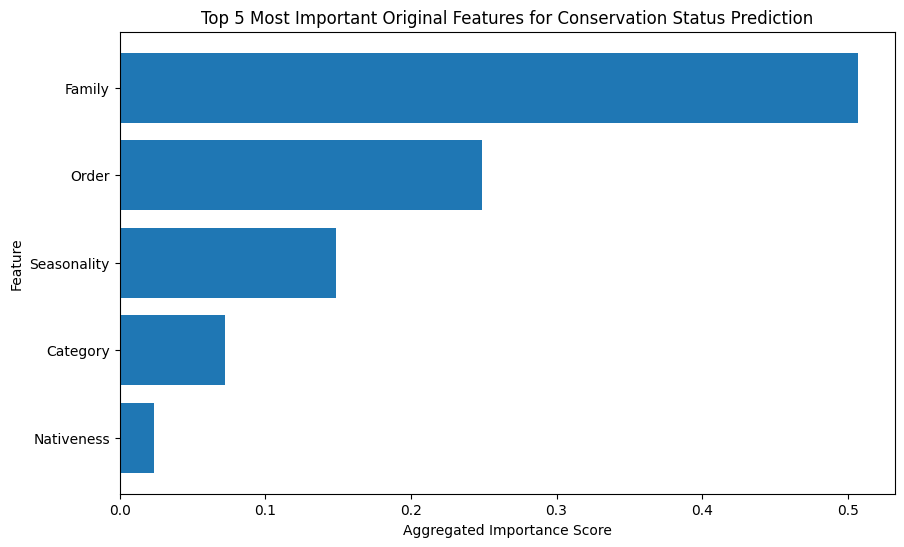

In [40]:
def extract_original_feature_name(encoded_name):
    return re.split('_|-', encoded_name)[0]

original_feature_mapping = {feature: extract_original_feature_name(feature) for feature in X.columns}

aggregated_importances = {}
feature_importances = model.feature_importances_
for encoded_feature, original_feature in original_feature_mapping.items():
    aggregated_importances.setdefault(original_feature, []).append(
        feature_importances[X.columns.get_loc(encoded_feature)]
    )

average_importances = {feature: sum(importances) for feature, importances in aggregated_importances.items()}

importance_df = pd.DataFrame({
    'Feature': list(average_importances.keys()),
    'Importance': list(average_importances.values())
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
plt.xlabel('Aggregated Importance Score')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Original Features for Conservation Status Prediction')
plt.show()

As seen in the graph, the family feature in the dataset has the highest importance when predicting a species' conservation status. Order and seasonality also have an aggregated importance score of greater than 0.1, indicating that they are somewhat important as well for the prediction model. The significance of this graph is that we are able to pinpoint what features to look at to more accurately predict whether or not a species will become endangered; we now know that the type of species plays a big role in whether or not they are close to becoming endangered, and the seasonality of the species also plays a big role. Because we now know the general features of a species that determines their conservation status, we can hopefully use these types of models in the future to predict whether or not a species is in need of help in order to avoid endangerment.

# **Insights and Conclusions**

Our goal for this tutorial was to study the impact of type, origin, and behaviour on the conservation status of a species over National Parks in the US.

---

**EXPLORATORY ANALYSIS**

After some data cleaning, we performed several statistical tests as part of our exploratory analysis.

The first was an independent T-test to check if the amount of non-native species was significantly different than native species. Through this test, we found that the difference between the two groups is, in fact, significantly different.

The second test was a chi-squared test to check if the category of a species affected whether it was present in a certain park or not. Again, through our test, we were able to conclude that the category of a species does play a role in its presence in a national park (Though, it should be mentioned that our test used a raw number rather than a percentage, which could have skewed our results).

Finally, we used an ANOVA test to check if the location of the park affected the percentage of native species in the park. This, again, returned to us a result that told us that park region does have an effect on the percentage of native species there. While we could have run further hypothesis tests to determine which specific regions have a different native species percentage, we elected not to as we felt it was not necessary for our study.

---
**MACHINE LEARNING MODEL**

In order to complete our goal and allow others to gain an understanding for the effect of a species' attributes on its conservation status, we decided to use a Random Forest Classifier model. Through use of this, we were able to create a model that was able to predict whether a species was endangered based off its attributes with 90% accuracy. However, it was more flawed when trying to predict how endangered the species was - this is something that we would like to look into fixing moving forward. Overall, however, our model did a good job at accomplishing our goal: based off of a species' attributes, predict whether or not it is endangered.

---
**OVERALL CONCLUSIONS AND MOVING FORWARD**

The conclusions from our research can be used to achieve a much greater understanding of what classifies a species as endangered in the US National Parks. This can be helpful in determining whether unlisted or newly introduced species should also be classified as endangered. Classifying species as endangered can help identify which species need more help, and because of this we are able to give our best efforts towards preventing species from become extinct.Furthermore, our machine learning model will allow for further efficiency in making this conclusion.

In the future, we would like to explore methods to make our Random Forest Classifier model more accurate at predicting exactly how endangered a species is. Furthermore, we would like to explore other factors that may affect the level of endangerment of a species, as well as parks and other areas outside of the US.